# Python Machine Learning 4 - Classification 2

<p><a name="sections"></a></p>


## Sections

- <a href="#svm">Support Vector Machine</a><br>
- <a href="#svm-sklearn">SVM in Scikit Learn</a><br>
 - <a href="#1caes1">Case 1: Binary Classification</a><br>
     - <a href="#1ex1">Exercise</a><br>
 - <a href="#1caes2">Case 2: Multiclass Classification</a><br>
     - <a href="#1ex2">Exercise</a><br>
 - <a href="#1caes3">Case 3: Grid Search</a><br>
- <a href="#tree">Decision Tree in Scikit Learn</a><br>
  - <a href="#2ex1">Exercise</a><br>
  - <a href="#2case1">Case 1: Iris Data</a><br>
  - <a href="#2case2">Case 2: Spam Filter</a><br>
  - <a href="#2case3">Case 3: Grid Search</a><br>
  - <a href="#2case4">Case 4: Depth of Tree</a><br>
- <a href="#rf">Random Forest in Scikit Learn</a><br>
  - <a href="#3case1">Case 1: Iris Data</a><br>
  - <a href="#3case2">Case 2: Spam Filter</a><br>
  - <a href="#3case3">Case 3: Grid Search</a><br>
  - <a href="#3case4">Case 4: Number of Trees</a><br>

<p><a name="svm"></a></p>
## Support Vector Machines

- Support vector machines (SVMs) are supervised learning methods used for classification analysis.

- Unlike linear discriminant analysis or logistic regression, SVMs approach the two-class classification problem in a direct way: construct linear decision boundaries, by explicitly separating the data in two different classes as well as possible.

- The decision boundaries are called hyperplanes in the feature space.


### Hyperplanes

A hyperplane of a *p-dimensional* space *V* is a subspace of dimension *p-1*.

- A hyperplane can be described with a single linear equation of the form (in Cartesian coordinates):

$$\beta_0 + \beta_1 X_1 + ... + \beta_p X_p = 0$$

  - It is more convenient to be written in the matrix form $\beta_0 + \beta^T X = 0$, where $\beta = (\beta_1, ... \beta_p)$ and $X = (X_1, ... X_p)$ are *p-dimensional* vectors.
  
  - In a 2-dimensional space, a hyperplane is a line and in a 3-dimensional space it is a plane.


- The coefficient vector $\beta$ is the **normal vector** - a vector orthogonal to the surface of that hyperplane.

- In some cases we need to work with the normalized form: $\beta^* = \beta / \lvert \beta \rvert$, or equivalently, to require that $\sum_i^p \beta_i^2 = 1$

Some properties:

- For any point $x_0$ in the hyperplane, $\beta^T x_0 = -\beta_0$

- For any two points $x_1$ and $x_2$ lying in the hyperplane, we always have $\beta^T (x_1 - x_2) = 0$, that is, the normal vector $\beta$ is perpendicular to any vectors within the hyperplane.

- The signed distance of any point $x$ to the hyperplane is given by:

$$f(x) = \frac{1}{\lvert \beta \rvert}(\beta^T x + \beta_0)$$


### Separating Hyperplanes

- If we assume that the data can be well separated by a hyperplane defined by $f(X) = \beta_0 + \beta^T X = 0$, then:

  - $f(X) > 0$, for points on one side of the hyperplane,
  - $f(X) < 0$, for points on the other side.

- We coded the two classes as:

  - $y = 1$, for $f(X) > 0$
  - $y = -1$, for $f(X) < 0$

- The distances times the classes become positive: $y_i \cdot f(X_i) > 0$

### Optimal Separating Hyperplanes

- Goal: to maximize the margin, defined by the distance from the data point to a hyperplane,  between the two classes on the training data.

- The data points that are used to determine the margins are called support vectors.


### Maximal Margin Classifier

The optimal separating hyperplane leads to a constrained optimization problem:

$$\underset{\beta_0, \lvert \beta \rvert = 1}{\mathrm{max}} M$$

$$\mbox{subject to  }y_i(x_i^T \beta + \beta_0) \geq M, i = 1, ..., N$$

The set of conditions ensure that the distances from all the points to the decision boundary defined by $\beta$ and $\beta_0$ are at least $M$, and we seek the largest $M$ by varying the parameters.

We can get rid of the constraint $\lvert \beta \rvert = 1$ by replacing the condition with:

$$y_i(x_i^T \beta + \beta_0) \geq M \lvert \beta \rvert$$

For any $\beta$ and $\beta_0$ satisfying the inequalities, any positively scaled multiple satisfies them too. If we set $\lvert \beta \rvert = 1/M$, we can rephrase the problem to a more convenient form by dropping the norm constraint on $\beta$:

$$\underset{\beta_0, \beta}{\mathrm{min}} \frac{1}{2}\lvert \beta \rvert^2$$

$$\mbox{subject to  }y_i(x_i^T \beta + \beta_0) \geq 1$$

This is a convex quadratic problem, and can be solved efficiently.

### Noisy Data

- The technique for constructing an optimal separating hyperplane can be applied to cases of two perfectly separated classes.

- However, sometimes the data can be noisy, which can lead to a poor solution for the maximal margin classifier.


### Non-separable Data

- Even worse, quite often the data is not separable by a linear boundary.

- What shall we do?


### The Support Vector Classifier

- To tolerate noise and errors, we still maximize M but meanwhile allow some points to be on the wrong side of the hyperplane.

- We introduce “slack” variables $\epsilon = (\epsilon_1, ... \epsilon_N)$ with $\epsilon_i \geq 0$ and $\sum_i \epsilon_i \leq \mbox{Const}$, and modify the optimization problem to be:

$$
\underset{\beta_0, \epsilon, \lvert \beta \rvert = 1}{\mathrm{max}} M
$$

$$
\mbox{ subject to }
\begin{cases}
y_i(x_i^T \beta + \beta_0) \geq M (1 - \epsilon_i)
\\
\epsilon_i \geq 0 \mbox{, and } \sum_i \epsilon_i \leq \mbox{Const}
\end{cases}
$$

- $\epsilon_i$ are proportional to the amount by which the prediction is on the wrong side of their margin. 
- Misclassifications occur when $\epsilon_i > 1$. So given that the constraint $\sum \epsilon_i = \mbox{Const}$, the total number of misclassifications will be bounded by $\mbox{Const}$.

- The effect of the data points that fall into the margin will be penalized by the slack variable $\epsilon$.


Computationally it's convenient to use the form:

$$
\underset{\beta_0, \beta}{\mathrm{min}} \big( \frac{1}{2} \lvert \beta \rvert^2 + C \sum_{i=1}^N \epsilon_i \big)
$$

$$
\mbox{ subject to }
\begin{cases}
y_i(x_i^T \beta + \beta_0) \geq 1 - \epsilon_i
\\
\epsilon_i \geq 0
\end{cases}
$$

where $C$ is the penalty parameter of the error term.

- If $C$ is close to 0 then we have a wide, soft margin.

- If $C$ is large then we are close to the hard-margin formulation.


### Beyond Linearity

The support vector classifier described so far finds linear boundaries in the feature space.

In reality, it's very unlikely that the true boundary is actually linear in $X$.

If a linear boundary fails, we need to move beyond linearity. 

The core idea is to enlarge the features $X$ using basis expansions such as polynomials, and then use linear models in the enlarged space of derived input features, and translate to nonlinear boundaries in the original space.

Example: 
- We enlarge the feature space $(X_1, X_2)$ to $(X_1, X_2, X_1^2, X_2^2, X_1X_2)$
- The boundary is then a hyperplane in *5-dimensional* space determined by:
$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2, + \beta_3 X_1^2 + \beta_4 X_1 X_2 + \beta_4 X_2^2 = 0
$$

*Examples*

### Kernels

- In general, the idea for nonlinearity is to map the feature X to a high dimensional space by some mapping functions $h(x)$.

- Notice that only the inner-products of the input vectors play a role in the optimization problem (the proof of this requires to derive a so called Lagrangian dual function which is beyond the scope of this course).

- A more elegant and controlled way to have nonlinear boundaries is to use kernels.

- We first introduce the notation for inner product of two vectors:

$$\left \langle x, x^\prime \right \rangle = \sum_{i=1}^p x_i x_i^\prime$$

- It can be mathematically proven that the linear vector classifier can be represented as

$$f(x) = \beta_0 + \sum_{i=1}^N \alpha_i y_i\left \langle x, x_i \right \rangle$$

- where $\alpha_i > 0$ are parameters subject to $0 < \alpha_i < C$. For the data points that are not  support vectors, their $\alpha_i$ are equal to 0.

- Since the support vector classifiers involve the mapping h(X) only through inner products, instead of specifying the transformation, we only need to provide a kernel function

$$K(x, x^\prime) = \left \langle h(x), h(x^\prime) \right \rangle$$

- Some popular choices for kernel functions for SVMs are:

  - *d*th-Degree polynomial: $K(x, x^\prime) = (1+\left \langle x, x^\prime \right \rangle)^d$
  
  - Radial basis: $K(x, x^\prime) = \exp(-\gamma \lvert x - x^\prime \rvert)^2$
  
  
$$f(x) = \beta_0 + \sum_{i=1}^N \alpha_i y_i K(x, x_i)$$

<p><a name="svm-sklearn"></a></p>
## SVM in Scikit Learn

- In order to implement SVM in python, import **svm** module from sklearn library.

In [1]:
from sklearn import svm
svm_model = svm.SVC(kernel='poly', C=1e5, degree=1)

- Here we choose the 'poly' kernel, and set the degree equals to 1, which means a linear boundary.
- $C=1e5$ is used to decrease the effect of the error term.

### Kernels

These are the kernels that sklearn offers:

- **linear**: $<x_1, x_2>$.
- **polynomial**: $(\gamma <x_1, x_2> + r)^d$. $d$ is specified by the argument `degree`, $r$ by `coef0`.
- **rbf**: $\exp(-\gamma \parallel x_1-x_2 \parallel^2)$. $\gamma$ is specified by the argument `gamma`, must be greater than 0.
- **sigmoid**: $(\tanh(\gamma <x_1,x_2> + r))$, where $r$ is specified by `coef0`.

The linear kernel is the original feature space. In terms of the polynomial kernel, it's equivalent to linear kernel when $\gamma=1$ and $r=0$.

### Arguments:

- **kernel**: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given, it is used to precompute the kernel matrix.

- **C**: Penalty parameter of the error term. $C=1$ by default.

- **degree**: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

### Methods:

- **fit**: Fit the SVM model according to the given training data.
- **score**: Return the mean accuracy on the given test data and labels.
- **predict**: Perform classification on samples in X.
- **set_params**: Set the parameters of this estimator.
- **get_params**: Get the parameters of this estimator.

### Attributes:

- **support\_**: return the index of the support vectors.
- **n\_support\_**: return the number of support vectors.
- **support\_vectors\_**: return the value of support vectors.

<p><a name="1case1"></a></p>
### Case 1: Binary Classification

We demonstrate the `svm` model on the first 100 observation of the iris data, which include two species.

In [2]:
import numpy as np
from sklearn import datasets
## prepare data
iris = datasets.load_iris()
index = range(100)
iris.x = iris.data[index, :]
iris.y = iris.target[index]
## fit
svm_model.fit(iris.x[:, 0:2], iris.y)

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
svm_model.score(iris.x[:, 0:2], iris.y)

1.0

In [4]:
svm_model.n_support_

array([2, 2], dtype=int32)

In [5]:
svm_index = svm_model.support_ # index of support vector
print('Index of support vector: ' + str(svm_index))

Index of support vector: [36 41 57 84]


In [6]:
## There are two support vectors in each class.

support = svm_model.support_vectors_ # value of support vector
print(support)

[[ 5.5  3.5]
 [ 4.5  2.3]
 [ 4.9  2.4]
 [ 5.4  3. ]]


In [7]:
iris.x[svm_model.support_, 0:2] # equivalent to svm_model.support_vectors_

array([[ 5.5,  3.5],
       [ 4.5,  2.3],
       [ 4.9,  2.4],
       [ 5.4,  3. ]])

Below we visualize the result:

In [8]:
def plot_model(model, x, y, label):
    """
    model: a fitted model
    x, y: two variables, should be numpy arrays
    label: true label
    """
    margin = 0.5
    x_min = x.min() - margin
    x_max = x.max() + margin
    y_min = y.min() - margin
    y_max = y.max() + margin
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    cmap_name = 'red_blue_classes'
    cmap = colors.LinearSegmentedColormap(
        name=cmap_name,
        segmentdata={
            'red': [(0, 1, 1), (1, 0.7, 0.7)],
            'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
            'blue': [(0, 1, 0.5), (1, 1, 1)]
    })
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # plot colormap
    plt.pcolormesh(xx, yy, Z, cmap=cmap_name)
    # plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    # plot scatters and true labels
    plt.scatter(x, y, c=label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if hasattr(model, 'support_'):
        # if it is a SVC model, plot the support vectors
        index = model.support_
        plt.scatter(x[index], y[index], c=label[index], s=200, alpha=0.33, edgecolors='k')

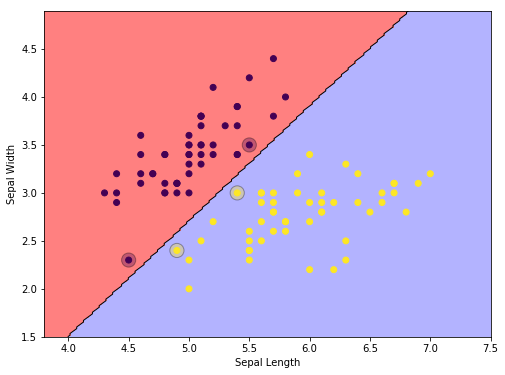

In [9]:
import  matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6
svm_model.fit(iris.data[index, 0:2], iris.target[index])
plot_model(svm_model, iris.data[index, 0], iris.data[index, 1], iris.target[index])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

#### Change the Degree

This time we set *degree=3*, which result in a cubic boundary:

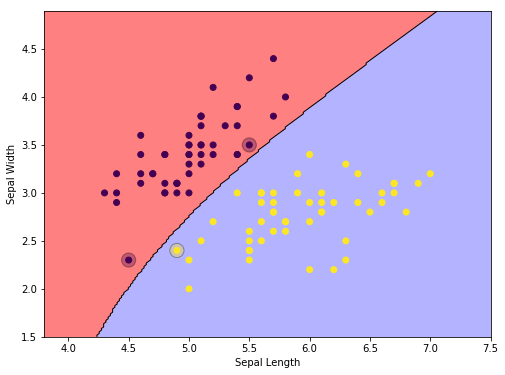

In [10]:
svm_model.set_params(degree=3)
svm_model.fit(iris.data[index, 0:2], iris.target[index])
plot_model(svm_model, iris.data[index, 0], iris.data[index, 1], iris.target[index])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

<p><a name="1ex1"></a></p>
### Exercise

With the `svm_model` from the previous slide:
- Compute the accuracy.

In [11]:
#### Your code here
svm_model.score(iris.data[index, 0:2], iris.target[index])

1.0

- Find out all the support vectors.

In [12]:
#### Your code here
svm_model.support_vectors_

array([[ 5.5,  3.5],
       [ 4.5,  2.3],
       [ 4.9,  2.4]])

- Which classes do they belong to?

In [13]:
#### Your code here
svm_model.predict(svm_model.support_vectors_)

array([0, 0, 1])

<p><a name="1case2"></a></p>
### Case 2: Multiclass Classification

- In cases of multiclass classification problem, **SVC** implement a *one vs one* approach.

- If there are $k$ different classes in total, then $\frac{k(k-1)}{2}$ classifiers are constructed.

For instance, 3 classes 0, 1 and 2 will result in 3 classifiers:

- class 0 VS class 1
- class 0 VS class 2
- class 1 VS class 2



This time we use all the observations in the iris data to build a multiclass classifier. And we choose the last two features "petal length" and "petal width".

In [14]:
svm_model.set_params(degree=1) # reset degree to 1 to build a linear classifier
svm_model.fit(iris.data[:, 2:4], iris.target) # fit on all the observations
svm_model.score(iris.data[:, 2:4], iris.target) # accuracy

0.95999999999999996

In [15]:
## Make a prediction:
svm_model.predict([[1, 4]])

array([0])

Visualize the result:

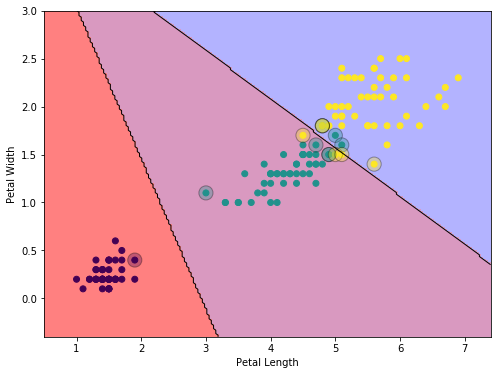

In [16]:
plot_model(svm_model, iris.data[:, 2], iris.data[:, 3], iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

<p><a name="1ex2"></a></p>
### Exercise

Predict the following observations with the model we created and then confirm the result with the visualization in the previous slide.
- petal length: 1.5, petal width: 0.5
- petal length: 4.0, petal width: 0.5
- petal length: 6.0, petal width: 2.5

In [17]:
#### Your code here

svm_model.predict([[1.5, 0.5], [4.0, 0.5], [6.0, 2.5]])

array([0, 1, 2])

Below we change to a different constant `C` (reset `C = 1` from `C=1e5` to decrease the effect of penalty)

In [18]:
svm_model.set_params(C=1)
svm_model.fit(iris.data[:, 2:4], iris.target) 
svm_model.score(iris.data[:, 2:4], iris.target) 

0.96666666666666667

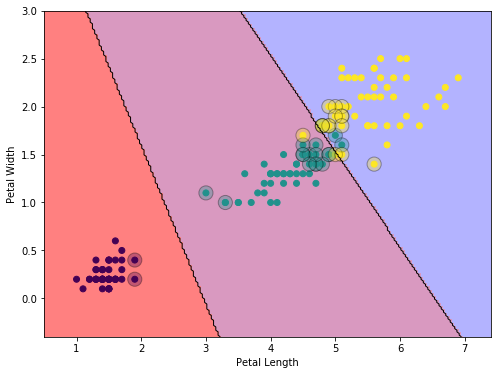

In [19]:
plot_model(svm_model, iris.data[:, 2], iris.data[:, 3], iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

<p><a name="1caes3"></a></p>
### Case 3: Grid Search

There are many parameters to be set in SVM:

- Which kernel.
- The value of $C. \quad$
- The degree in polynomial kernel.

We can use the function **grid_search.GridSearchCV** to select the best combination of parameters.

In [20]:
from sklearn import model_selection
grid_para_svm = [
    {'C': [1, 10, 100, 1000],
     'kernel': ['poly'],
     'degree': [1, 2, 3]},
    {'C': [1, 10, 100, 1000],
     'gamma': [0.001, 0.0001],
     'kernel': ['rbf']}
]

In [21]:
grid_search_svm = model_selection.GridSearchCV(svm_model, grid_para_svm, scoring='accuracy', cv=3, n_jobs=-1)
grid_search_svm.fit(iris.data, iris.target)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [1, 2, 3]}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

Inspect the result of grid search.

In [22]:
grid_search_svm.cv_results_

{'mean_fit_time': array([ 0.00538929,  0.00545271,  0.00245897,  0.00100223,  0.00126497,
         0.00397786,  0.0011603 ,  0.00537562,  0.01441042,  0.00078464,
         0.01027671,  0.02787193,  0.00135271,  0.00113336,  0.00083335,
         0.0013113 ,  0.00093007,  0.00112168,  0.00078106,  0.00073258]),
 'mean_score_time': array([ 0.001249  ,  0.00075912,  0.00065732,  0.00046166,  0.00044727,
         0.00043273,  0.00039355,  0.00035993,  0.00056728,  0.00037917,
         0.00046929,  0.00037193,  0.00065072,  0.00049392,  0.00064333,
         0.00062188,  0.00048081,  0.00055846,  0.00042399,  0.00040531]),
 'mean_test_score': array([ 0.96666667,  0.96666667,  0.96666667,  0.97333333,  0.96666667,
         0.96666667,  0.97333333,  0.96666667,  0.96      ,  0.97333333,
         0.96666667,  0.96      ,  0.91333333,  0.91333333,  0.94666667,
         0.91333333,  0.97333333,  0.94666667,  0.98666667,  0.97333333]),
 'mean_train_score': array([ 0.97682709,  0.97999604,  0.983363

The best combination of parameters is:

In [23]:
grid_search_svm.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [24]:
## The best score is
grid_search_svm.best_score_

0.98666666666666669

In [25]:
## The performance on the original data set is:
grid_search_svm.score(iris.data, iris.target)

0.97999999999999998

It seems `best_score_` from grid search is better than the score on the whole training data. Does that make sense?

In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lst1 = []
lst2 = []
for i in range(50):
    index = np.random.choice(range(150), size=150, replace=False)
    x = iris.data[index,:]
    y = iris.target[index]
    skf = StratifiedKFold(n_splits=3)
    grid_search_svm = GridSearchCV(svm_model, grid_para_svm, scoring='accuracy', cv=skf)
    grid_search_svm.fit(x, y)
    lst1.append(grid_search_svm.best_score_)
    lst2.append(grid_search_svm.score(x, y))

In [27]:
print(np.mean(lst1))
print(np.mean(lst2))

0.9764
0.9808


<p><a name="tree"></a></p>
## Decision Tree in Scikit Learn

- Similar to regression, we use the same procedure to fit a classification tree.

- For regression we used the RSS to determine the splitting,  what should we use for classification? Two commonly used metrics are:

  - gini impurity: $I_G(f) = \sum_{i=1}^m f_i(1-f_i)$

  - information gain: $I_E(f) = -\sum_{i=1}^m f_i \log_2(f_i)$
  
where $f_i$ is the fraction of items labeled with $i$ in the set and $\sum f_i = 1$.

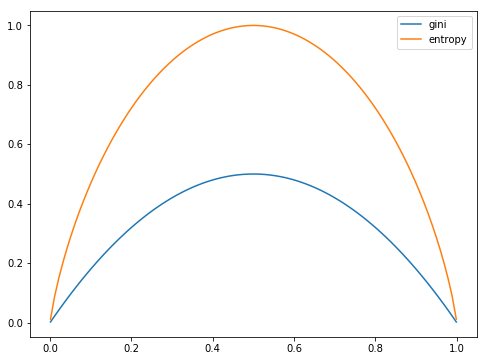

In [28]:
import math
x = np.linspace(start=.001, stop=.999, num=100)  # math.log won't accept 0 or 1
y1 = list(map(lambda i: 2 * i * (1 - i), x))
y2 = list(map(lambda t: -t * math.log(t, 2) - (1 - t) * math.log((1 - t), 2), x))

plt.plot(x, y1, label='gini')
plt.plot(x, y2, label='entropy')
plt.legend(loc=1)
plt.show()

<p><a name="2ex1"></a></p>
### Exercise : Gini impurity and Information Gain

- We will use the `purity` function defined below:

In [29]:
from collections import Counter
import math

def purity(L, metric='gini'):
    total = len(L)
    freq = map(lambda x: float(x) / total, list(Counter(L).values()))
    if metric == 'gini':
        scores = map(lambda x: x * (1 - x), freq)
    elif metric == 'entropy':
        scores = map(lambda x: -x * math.log(x, 2), freq)
    return sum(scores)

Suppose there are 10 people in a group, 5 male and 5 female. Their heights are listed below

5'2"|5'3"|5'5"|5'6"|5'6"|5'7"|5'7"|5'8"|5'10"|5'11"
-|-|-|-|-|-|-|-|-|-
f|f|f|f|m|f|m|m|m|m


L = ['f','f','f','f','m','f','m','m','m','m']
- What is the gini impurity?

In [30]:
#### Your code here

L = ['f', 'f', 'f', 'f', 'm', 'f', 'm', 'm', 'm', 'm']
gini = purity(L)
print(gini)

0.5


- If we split the group from the middle (between 5'6" and 5'7") into 
  - L1 = ['f','f','f','f','m'], and 
  - L1 = ['f','m','m','m','m'],
  what is the weighted sum of gini impurity? And what is the change of gini impurity before and after splitting?

In [31]:
#### Your code here

gini_split = 0.5 * purity(L[:5]) + 0.5 * purity(L[5:])
print(gini_split)
print(gini - gini_split)

0.32
0.18


- Try different cutpoints to see which points gives the maximum difference? How can we use this cutpoint for our prediction? 

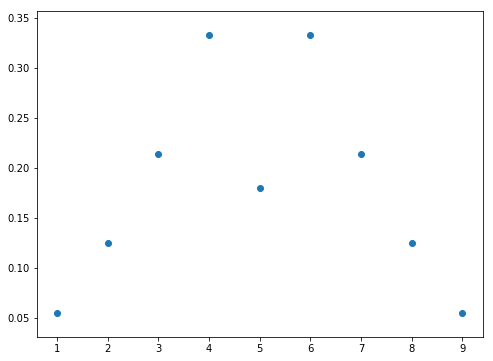

In [32]:
import matplotlib.pyplot as plt
x = range(1, len(L))
func = lambda i: gini - i * purity(L[:i]) / len(L) - (len(L) - i) * purity(L[i:]) / len(L)
y = list(map(func, x))
plt.scatter(x, y)
plt.show()

## Decision Tree in Scikit Learn

The function **tree.DecisionTreeClassifier** in sklearn can be used to implement decision tree.

In [33]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

### Arguments:

- **criterion**: "gini" or "entropy", corresponding to the criteria of "gini impurity" and "information gain". default = 'gini'.

- **max_depth**: The maximum depth of the tree. default = None, which means the nodes will be expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- **min_samples_split**: The minimum number of samples required to split. default = 2.

- **min_samples_leaf **: The minimum number of samples required to be at a terminate node. default = 1.

### Methods:

- **fit**: Build a decision tree from the training set (X, y).

- **predict**: 	Predict class or regression value for X.

- **predict_log_proba**	Predict class log-probabilities of the input samples X.

- **predict_proba**	Predict class probabilities of the input samples X.

- **score**:	Return the mean accuracy on the given test data and labels.

- **set_params**:	Set the parameters of this estimator.

- **get_params**: Get parameters for this estimator.

### Attributes:

- **tree\_**: Tree object, the underlying tree object.

- **feature\_importances\_**: The feature importances. The higher, the more important the feature. Also known as gini importance.

<p><a name="2case1"></a></p>
### Case 1: Iris Data

We use all the observations and the last two features, "petal length" and "petal width", in the iris data to build a decision-tree.

In [34]:
from sklearn import datasets
iris = datasets.load_iris()
tree_model.fit(iris.data[:, 2:4], iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

We can find the performance of the model and the importance of each feature. 

In [35]:
## We can see that the performance of decision tree is amazingly good!
tree_model.score(iris.data[:, 2:4], iris.target)

0.99333333333333329

In [36]:
print(tree_model.feature_importances_)

[ 0.57167834  0.42832166]


We visualize the decision boundary of the tree:

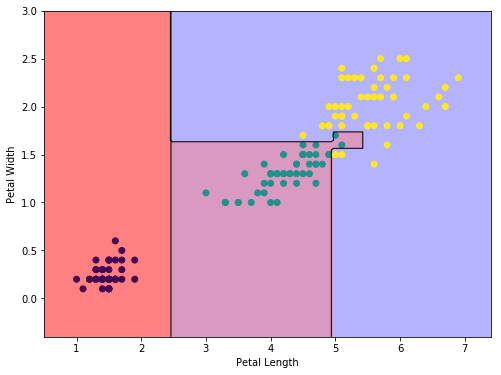

In [37]:
plot_model(tree_model, iris.data[:, 2], iris.data[:, 3], iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

<p><a name="2case2"></a></p>
### Case 2: Spam Filter

In this case we try to fit a decision tree on the spam data set.

In [38]:
# prepare data 
import pandas as pd
import numpy as np
train = pd.read_csv('data/spam_train.csv')
test = pd.read_csv('data/spam_test.csv')
## separate the predictors and response in the training data set
x_train = np.array(train.iloc[:, 0:57])
y_train = np.ravel(train.iloc[:, -1])
## separate the predictors and response in the test data set
x_test = np.array(test.iloc[:, 0:57])
y_test = np.ravel(test.iloc[:, -1])

Fit on the training data directly:

In [39]:
tree_model.fit(x_train, y_train)
train_error = (1 - tree_model.score(x_train, y_train))
test_error = (1 - tree_model.score(x_test, y_test))
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The training error is: 0.00043
The test     error is: 0.10083


- The training error here is also very low.
- The test error, however, is significantly higher than the training error.
- Despite the differences in error, decision tree performs quite well compared to other models.

The decision tree returns importance. We see that there a lot of features with zero importance, which allow feature selection.

In [40]:
tree_model.feature_importances_

array([ 0.00185947,  0.00152444,  0.00218315,  0.        ,  0.01380423,
        0.00311232,  0.17185104,  0.00920632,  0.0031167 ,  0.01475845,
        0.00728697,  0.00246904,  0.        ,  0.00054975,  0.00159188,
        0.02773903,  0.00544088,  0.00831559,  0.01907996,  0.00052881,
        0.01666189,  0.        ,  0.003879  ,  0.00946317,  0.06859392,
        0.        ,  0.00368922,  0.00241235,  0.00176496,  0.        ,
        0.        ,  0.        ,  0.00136447,  0.        ,  0.        ,
        0.00166187,  0.00240505,  0.        ,  0.01298095,  0.        ,
        0.        ,  0.00517029,  0.00355416,  0.        ,  0.00997887,
        0.0184011 ,  0.00121286,  0.        ,  0.00163333,  0.01321232,
        0.00349707,  0.08772276,  0.3220033 ,  0.00265043,  0.03274122,
        0.02819179,  0.05073563])

<p><a name="2case3"></a></p>
### Case 3: Grid Search 

- Since the test error is much higher than training error, the model may overfit the training data.
- Use cross-validation to find out the best parameters and evaluate the model.

In [41]:
from sklearn.model_selection import GridSearchCV
grid_para_tree = [{
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_model.set_params(random_state=108)
grid_search_tree = GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy', n_jobs=-1)
%time grid_search_tree.fit(x_train, y_train)

CPU times: user 3.35 s, sys: 142 ms, total: 3.49 s
Wall time: 21.3 s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=108,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(1, 10), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [42]:
## best parameters
grid_search_tree.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 30}

In [43]:
## best score
grid_search_tree.best_score_

0.91434782608695653

- The best "min_samples_split" is 30 here, while the default value is 2, which may overfit the training data and underestimate the test error.
- It is necessary to use cross-validation method to choose the parameters.

In [44]:
## The overall accuracy on the training set:
grid_search_tree.score(x_train, y_train)

0.95434782608695656

In [45]:
## The overall accuracy on the test set:
grid_search_tree.score(x_test, y_test)

0.90743155149934807

<p><a name="2case4"></a></p>
### Case 4: Depth of Tree

- The code below displays the learning curve. The training and the testing error are plotted against the depth of the trees.

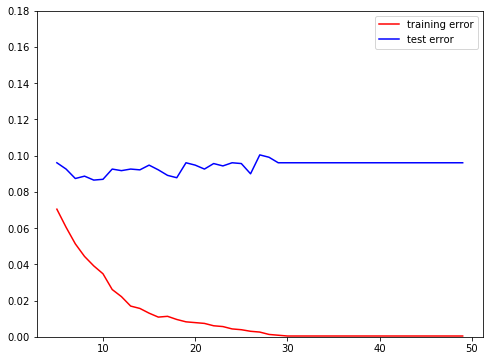

In [46]:
depth = range(5, 50)
train_error = []
test_error = []
for i in depth:
    tree_model.set_params(max_depth=i, min_samples_leaf=1)
    tree_model.fit(x_train, y_train)
    train_error.append(1 - tree_model.score(x_train, y_train))
    test_error.append(1 - tree_model.score(x_test, y_test))

import matplotlib.pyplot as plt
plt.plot(depth, train_error, c='red', label='training error')
plt.plot(depth, test_error, c='blue', label='test error')
plt.ylim(0, 0.18)
plt.legend()
plt.show()

As the depth of the tree increase:

- The training error goes down.
- The test error does not change too much.
- For interpretability, it's better to choose a smaller tree.

### Decision Trees Pros and Cons

- Pros:
  - Interpretability: easier to explain than most other regression methods.
  - Easy to handle qualitative predictors.
  - Can be displayed graphically.
- Cons:
  - Instability: a small change in the data may result in a huge different splits.
  - Predictive accuracy usually not as good as other approaches.
- By aggregating many decision trees, the predictive performance can be improved substantially.


<p><a name="rf"></a></p>
## Random Forest in Scikit Learn

### Bagging

By averaging a collection of bootstrap (repeated) samples from the training data set, we can dramatically reduce the variance of trees, leading to improved prediction, this is called bagging.

- generate B bootstrapped training dataset.

- for each test observation, we record the class predicted by each of the B trees, and choose the majority

- the overall prediction is the most commonly occurring class among the B predictions.



The function **ensemble.RandomForestClassifier** in library sklean can be used to implement random forest.

In [47]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

### Arguments

Since random forest is combined by decision trees, it also has the arguments of tree: 

- **criterion** : default=”gini”.
- **max_depth**: default = None.
- **min_samples_split**: default = 2.
- **min_samples_leaf**: default = 1.
- **n_estimators**: The number of trees. default=100.
- **bootstrap**: Whether bootstrap samples are used when building trees. default=true.
- **oob_score**: Whether to use out-of-bag samples to estimate the generalization error. default=false.

### Methods

- **fit**: Build a forest of trees from the training set (X, y).
- **score**: Return the mean accuracy on the given test data and labels.
- **predict**: Predict class for X.
- **predict_log_proba**: Predict class log-probabilities for X.
- **predict_proba**: Predict class probabilities for X.
- **set_params**: Set the parameters of this estimator.
- **get_params**: Get parameters for this estimator.

### Attributes

- **feature\_importances\_**:The feature importances (the higher, the more important the feature).

- **oob\_score\_**: Score of the training dataset obtained using an out-of-bag estimate.

<p><a name="3case1"></a></p>
### Case 1: Iris Data

We use all the observations and the last two features, "petal length" and "petal width", in the iris data to build a decision-tree.

In [48]:
randomForest.set_params(random_state=42)
randomForest.fit(iris.data[:, 2:4], iris.target) # fit 
randomForest.score(iris.data[:, 2:4], iris.target) # accuracy

0.98666666666666669

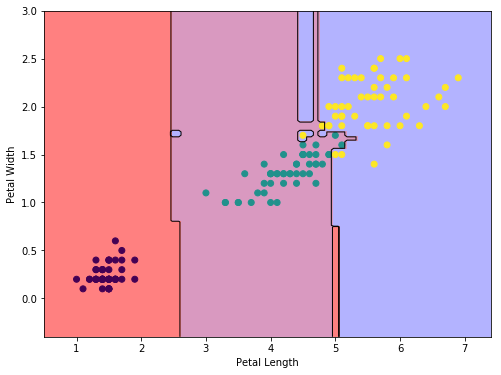

In [49]:
plot_model(randomForest, iris.data[:, 2], iris.data[:, 3], iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

The boundary of random forest is highly non-linear and hard to interpret.

<p><a name="3case2"></a></p>
### Case 2: Spam Filter

In this case we fit a random forest on the spam data. We first prepare the data:

In [50]:
import pandas as pd
from sklearn import model_selection
spam_train = pd.read_csv('./data/spam_train.csv')
spam_test = pd.read_csv('./data/spam_test.csv')
x_train = np.array(spam_train.iloc[:, :57])
y_train = np.array(spam_train.iloc[:, -1])
x_test = np.array(spam_test.iloc[:, :57])
y_test = np.array(spam_test.iloc[:, -1])

In [51]:
randomForest.set_params(n_estimators=50, random_state=42)
randomForest.fit(x_train, y_train)
print("The training error of random forest is: %.5f" %(1 - randomForest.score(x_train, y_train)))
print("The test     error of random forest is: %.5f" %(1 - randomForest.score(x_test, y_test)))

The training error of random forest is: 0.00043
The test     error of random forest is: 0.05302


### Feature Importance

- We then sort the features by importance:

In [52]:
feature_importance = list(zip(train.columns[:-2], randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
feature_sort

array([(b'A.52',  0.10859347), (b'A.53',  0.1004286 ),
       (b'A.7',  0.09234787), (b'A.16',  0.07137666),
       (b'A.56',  0.06050948), (b'A.21',  0.04966204),
       (b'A.55',  0.0480585 ), (b'A.25',  0.04353665),
       (b'A.19',  0.03304565), (b'A.24',  0.02638849),
       (b'A.5',  0.02226375), (b'A.3',  0.02061829),
       (b'A.26',  0.01940852), (b'A.23',  0.01938681),
       (b'A.27',  0.01836404), (b'A.46',  0.01483708),
       (b'A.8',  0.01472056), (b'A.50',  0.01243138),
       (b'A.17',  0.01134717), (b'A.37',  0.01090894),
       (b'A.6',  0.01089926), (b'A.45',  0.01063103),
       (b'A.12',  0.01038626), (b'A.10',  0.01032017),
       (b'A.18',  0.009179  ), (b'A.2',  0.00837784),
       (b'A.11',  0.00766406), (b'A.9',  0.00625979),
       (b'A.1',  0.00604776), (b'A.28',  0.00572922),
       (b'A.49',  0.00569843), (b'A.36',  0.00433482),
       (b'A.13',  0.00421785), (b'A.39',  0.00405701),
       (b'A.42',  0.00390765), (b'A.51',  0.00362165),
       (b'A.35',  

In [53]:
## The first 10 most important features are:
[i for (i, j) in feature_sort[0:10]]

[b'A.52',
 b'A.53',
 b'A.7',
 b'A.16',
 b'A.56',
 b'A.21',
 b'A.55',
 b'A.25',
 b'A.19',
 b'A.24']

### OOB-Score

- oob-score is the *out of bag* score, which is also used to evaluate the model.
- After fitting on the bootstrap sample, it make predictions on the rest of the data set(out of the bootstrap sample).
- We can not control the numbers of observations in the out of bag sample.

We need to set *oob-score=true* manually when fit the model:

In [54]:
randomForest.set_params(oob_score=True, random_state=42)
randomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [55]:
randomForest.oob_score_

0.94173913043478263

<p><a name="3case3"></a></p>
### Case 3: Grid Search

As for decision tree, we also need to decide several parameters by grid search. It might take longer for this one.

In [56]:
grid_para_forest = [{
    "n_estimators": [25, 50, 100],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(x_train, y_train)

CPU times: user 20.8 s, sys: 830 ms, total: 21.6 s
Wall time: 9min 31s


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [25, 50, 100], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(1, 10), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]), 'random_state': [42]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [57]:
grid_search_forest.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100,
 'random_state': 42}

In [58]:
grid_search_forest.best_score_

0.94739130434782604

In [59]:
print("The training error is: %.5f" % (1 - grid_search_forest.score(x_train, y_train)))
print("The test     error is: %.5f" % (1 - grid_search_forest.score(x_test, y_test)))

The training error is: 0.00304
The test     error is: 0.05476


<p><a name="3case4"></a></p>
### Case 4: Number of Trees

- We plot the errors against the number of trees:

In [60]:
n_trees_range = range(30, 500, 10)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
    randomForest.set_params(n_estimators=n_trees, random_state=42, oob_score=True)
    randomForest.fit(x_train, y_train)
    train_error2.append(1 - randomForest.score(x_train, y_train))
    test_error2.append(1 - randomForest.score(x_test, y_test))
    oob_error.append(1 - randomForest.oob_score_)

We see that
- The OOB error is very close to the test error.
- The training error is much smaller than the OOB error and the test error.

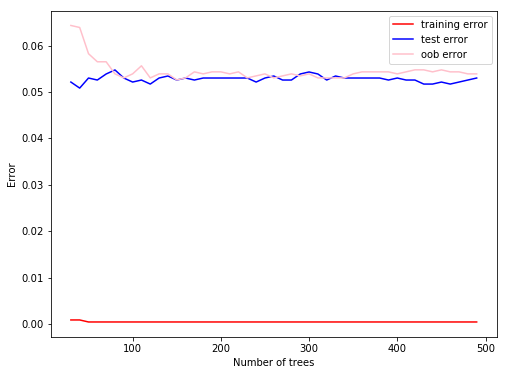

In [61]:
import matplotlib.pyplot as plt
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

Strengths:
- An all-purpose model that performs well on most problems.
- Can be used on data with an extremely large number of features. And it automatically selects the most important features.
- High accuracy.

Weaknesses:
- Unlike a decision tree, the model is hard to interpret.
- May require some work to tune the parameters.
